<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Marco Antonio Sánchez Covarrubias. Andrea Flores Fernandez.

**Fecha:** 22 de Noviembre del 2021.

**Expediente** : if720268. if725449.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/MarcoSC08/Tarea8_MASanchez_AFlores

# Tarea 8: Clase 22

## Valoración de opciones tipo "Put"
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de comparar con los resultados teoricos del método de valuación de Black-Scholes (ecuación del principio de clase)

### Ejercicio 1: $$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

#### Solución estudiante 1

In [1]:
conda install pandas-datareader

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
from datetime import datetime
ticker = 'AAPL'
source = 'stooq'
start = '2015-01-01'
end = datetime.today()
aapl_goo = web.DataReader(ticker, source, start=start)
aapl_goo

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-22,161.680,165.700,161.000,161.020,117467889
2021-11-19,157.650,161.020,156.533,160.550,117305597
2021-11-18,153.710,158.670,153.050,157.870,137827673
2021-11-17,150.995,155.000,150.990,153.490,88807000
2021-11-16,149.940,151.488,149.340,151.000,59256210
...,...,...,...,...,...
2015-01-08,24.723,25.388,24.598,25.328,262141489
2015-01-07,24.268,24.485,24.147,24.393,177012556
2015-01-06,24.142,24.316,23.681,24.052,290504541


In [4]:
# solución estudiante 1
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')


RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/options/AAPL
Response Text:
b'Forbidden'

In [ ]:
#Precio del activo subyacente 
aapl_opt.Underlying_Price[0]

In [ ]:
#Datos de la opción
aapl_opt.loc[0]
aapl_opt.loc[0, 'JSON']

In [ ]:
#tipos de opciones
aapl_opt.loc[:, 'Type']

In [ ]:
#fechas en que expiran
pd.set_option('display.max_rows', 10)
aapl_opt.loc[:, 'Expiry']

In [ ]:
#Consulta de opciones put 
fecha1 = '2021-06-18'
fecha2 = '2022-09-16'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

In [ ]:
#Put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g')

In [ ]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [ ]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [ ]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [ ]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [ ]:
#datos de opciones de Apple
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

In [ ]:
K = 290# strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

In [ ]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

In [ ]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

### Simulación de precios usando rendimiento simple y logarítmico 

#### Rendimiento Simple

In [ ]:
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

In [ ]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

nscen = 10000 # cantidad de escenarios a simular con montecarlo
dates = pd.date_range(start = today, end= expiry, freq='B')
ndays = len(dates)
dates

In [ ]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod() #producto acumulado

In [ ]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0] #ultimo de los precios
S_T = S_0*(1+Ri_dt).cumprod() #precio en el tiempo de cierre 

#### Rendimiento logarítmico 

In [ ]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [ ]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

$$ max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 

In [ ]:
opcion_valuar['JSON']

In [ ]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();
#para ver si nos aproximamos al last price 33.4
put.iloc[-1]

### 2. Valuación usando simulación: modelo normal para los rendimientos

In [ ]:
# media y desviación estándar muestral de los rendimientos logarítmicos
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

In [ ]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0016/360 # Tasa diaria
r

In [ ]:
#Simulacion de tiempo de contrato hoy hasta la fecha Expiry

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10 #Escenarios a simular
dates = pd.date_range(start='2019-11-14', periods = ndays)
dates

In [ ]:
#Rendimientos simulados 

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

In [ ]:
#Escenarios de precios respectivos

S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

In [ ]:
sim_closes.plot(figsize=(8,6));

In [ ]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [ ]:
opcion_valuar['JSON']

In [ ]:
opcion_valuar['JSON']['impliedVolatility']

In [ ]:
sigma = opcion_valuar['JSON']['impliedVolatility']/np.sqrt(252)
sigma

In [ ]:
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim

In [ ]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [ ]:
#LA VALUACION DE LA OPCION ES:
put.iloc[-1]

In [ ]:
# Intervalo de confianza del 99%

confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

### Precios simulados usando técnicas de reducción de varianza

In [ ]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [ ]:
#LA VALUACION DE LA OPCION ES:
put.iloc[-1]

Intervalo de confianza del 99%

In [ ]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

### Análisis de la distribución de los rendimientos

#### Ajustando norm

In [ ]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

#### Ajustando t

In [ ]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

In [ ]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

### 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

In [ ]:
# Cantidad de dias y numero de escenarios
ndays = 109 
nscen = 10

In [ ]:
#Probabilidad de ocurrencia es y
prob = y/np.sum(y)
values = x[1:]

In [ ]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

In [ ]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

In [ ]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

In [ ]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [ ]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

In [ ]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [ ]:
put_hist.iloc[-1]

In [ ]:
opcion_valuar['JSON']

Intervalo de confianza del 95%

In [ ]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

#### Solución estudiante 2

In [15]:
# Librerías necesarias
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Funciones necesarias
def options_yf(ticker):
    stock = yf.Ticker(ticker)
    calls, puts = {}, {}
    def options_yf_(n):
        nonlocal stock
        calls[stock.options[n]] = stock.option_chain(stock.options[n])[0]
        puts[stock.options[n]] = stock.option_chain(stock.options[n])[1]
    [options_yf_(n) for n in range(len(stock.options))]
    return calls, puts

def valuacionPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf, escenarios, 
                  metodo : "Rendimientos simples, Rendimientos logarítmicos, Modelo Normal, Histograma"):
    precios = yf.download(ticker, start = fechaInicio, end = None, progress = False)["Adj Close"]
    precioInicial = precios.iloc[-1] # se descargan los precios
    
    #Metodos 
    if metodo == "Rendimientos simples":
        rendimiento = precios.pct_change().dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()
        
    elif metodo == "Rendimientos logarítmicos":
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()
        
    elif metodo == "Modelo Normal":
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        volatilidad = rendimiento.std()
        
    else:
        rendimiento = np.log(precios / precios.shift(1)).dropna()
        media = rendimiento.mean()
        volatilidad = rendimiento.std()

    # Simulación de precios
    fechas = pd.date_range(start = datetime.date.today(), end = fechaExpiracion, freq = "B") 
    dias = len(fechas)
    
    if metodo == "Rendimientos simples" or metodo == "Rendimientos logarítmicos":
        Z = np.random.randn(dias, escenarios)
        rendimientosSimulados = pd.DataFrame(media + Z * volatilidad, index = fechas)
        
        if metodo == "Rendimientos simples":
            preciosSimulados = precioInicial * (rendimientosSimulados + 1).cumprod()
            preciosSimulados.iloc[0, :] = precioInicial 
    
        else:
            preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
            preciosSimulados.iloc[0, :] = precioInicial 
        
    elif metodo == "Modelo Normal":
        Z = np.random.randn(dias, escenarios)
        rendimientosSimulados = pd.DataFrame(volatilidad * Z + rf, index = fechas)
        preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
        preciosSimulados.iloc[0, :] = precioInicial
        
    else:
        y, x = np.histogram(rendimiento + rf - media, bins = 2000)
        y = y / np.sum(y)
        rendimientosSimulados_ = np.random.choice(x[1:], dias * escenarios, p = y)
        rendimientosSimulados = pd.DataFrame(rendimientosSimulados_.reshape((dias, escenarios)), index = fechas)
        preciosSimulados = precioInicial * np.exp(rendimientosSimulados.cumsum())
        
    # Valuación
    if metodo == "Simple" or metodo == "Logarítmico":
        put = pd.DataFrame({"Prima" : np.exp(-media * dias) * np.fmax(precioEjercicio - preciosSimulados, 0).mean(axis = 1)}, 
                           index = fechas) 
    else:
        put = pd.DataFrame({"Prima" : np.exp(-rf * dias) * np.fmax(precioEjercicio - preciosSimulados, 0).mean(axis = 1)}, 
                           index = fechas) 
    
    intervaloConfianza = st.norm.interval(0.99, loc = put.iloc[-1].values[0], scale = st.sem(preciosSimulados.iloc[-1]))
    
    # Resultados
    put.plot(figsize = (8, 5), title = metodo)
        
    return put.iloc[-1].values[0], intervaloConfianza[0], intervaloConfianza[1]

In [38]:
def blackScholesPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf):
    # Descarga de precios de cierre históricos para la acción
    precios = yf.download(ticker, start = fechaInicio, end = None, progress = False)["Adj Close"]
    precioInicial = precios.iloc[-1]
    
    # Rendimientos logarítmicos
    rendimiento = np.log(precios / precios.shift(1)).dropna()
    volatilidad = rendimiento.std()
    
    # Black and Scholes
    t = len(pd.date_range(start = datetime.date.today(), end = fechaExpiracion, freq = "B"))
    
    d1 = (np.log(precioInicial / precioEjercicio) + (rf + 0.5 * volatilidad ** 2) * t) / (volatilidad * np.sqrt(t))
    d2 = (np.log(precioInicial / precioEjercicio) + (rf - 0.5 * volatilidad ** 2) * t) / (volatilidad * np.sqrt(t))
    return precioEjercicio * np.exp(-rf * t) * st.norm.cdf(-d2)  - precioInicial * st.norm.cdf(-d1) 

In [39]:
ticker = "MSFT"
fechaExpiracion = "2022-01-21"
calls , puts = options_yf(ticker)
puts = puts[fechaExpiracion][(puts[fechaExpiracion]["strike"] >= 335) & (puts[fechaExpiracion]["strike"] <= 375)]
puts

,contractSymbol,lastTradeDate,strike,...,inTheMoney,contractSize,currency
53,MSFT220121P00335000,2021-11-23 20:57:57,335.0,...,False,REGULAR,USD
54,MSFT220121P00340000,2021-11-23 20:44:05,340.0,...,True,REGULAR,USD
55,MSFT220121P00345000,2021-11-23 20:59:18,345.0,...,True,REGULAR,USD
56,MSFT220121P00350000,2021-11-23 20:57:49,350.0,...,True,REGULAR,USD
57,MSFT220121P00355000,2021-11-23 20:59:05,355.0,...,True,REGULAR,USD
58,MSFT220121P00360000,2021-11-23 19:01:43,360.0,...,True,REGULAR,USD
59,MSFT220121P00365000,2021-11-23 16:45:11,365.0,...,True,REGULAR,USD
60,MSFT220121P00370000,2021-11-23 19:57:41,370.0,...,True,REGULAR,USD
61,MSFT220121P00375000,2021-11-23 15:02:15,375.0,...,True,REGULAR,USD


In [44]:
# Modelo de Black & Scholes
fechaInicio = "2015-11-15" 
indicePut = 56
precioEjercicio = puts.loc[indicePut].strike 
rf = 0.0018 / 360 
N = 10000 
primaReal = puts.loc[indicePut].lastPrice 
primaTeorica = blackScholesPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf)
resultados = pd.DataFrame({"Prima Real" : primaReal, "Prima Teórica B&S" : primaTeorica}, 
                         index = ["K = " + str(precioEjercicio)+ " " + fechaExpiracion])

resultados["% Error relativo (prima real)"] = np.round(abs(primaTeorica - primaReal) / primaReal * 100, 2)
resultados

,Prima Real,Prima Teórica B&S,% Error relativo (prima real)
K = 350.0 2022-01-21,19.0,22.152,16.59


,Prima,Límite inferior (99% confianza),Límite superior (99% confianza),% Error relativo (prima real),% Error relativo (prima teórica B&S)
Rendimientos simples,11.417,10.394,12.440,39.91,48.46
Rendimientos logarítmicos,11.397,10.353,12.441,40.02,48.55
Modelo Normal,21.007,20.034,21.981,10.56,5.17
Histograma,20.309,19.331,21.286,6.89,8.32


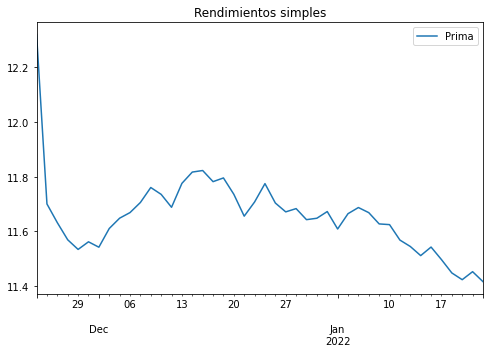

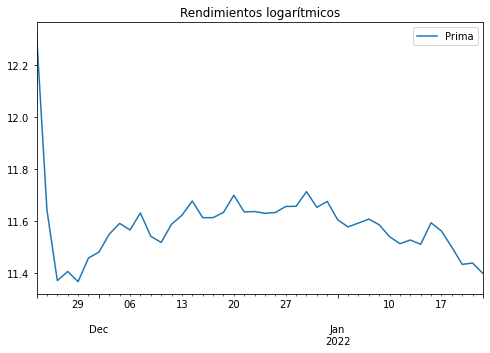

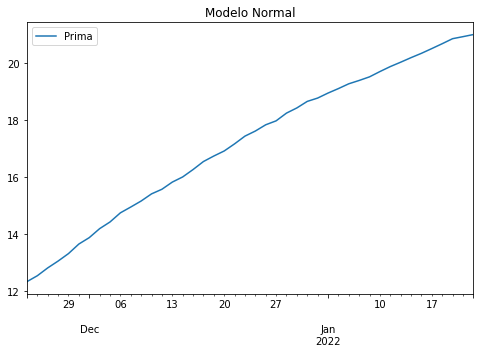

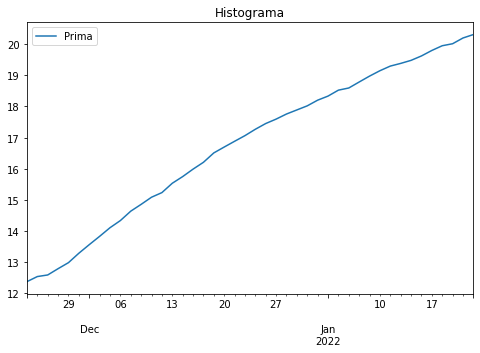

In [41]:
metodos = ["Rendimientos simples", "Rendimientos logarítmicos", "Modelo Normal", "Histograma"]
comparacion = pd.DataFrame([valuacionPut(ticker, fechaInicio, precioEjercicio, fechaExpiracion, rf, N, metodo) 
                       for metodo in metodos],
                       columns = ["Prima", "Límite inferior (99% confianza)", "Límite superior (99% confianza)"], 
                       index = metodos)

comparacion["% Error relativo (prima real)"] = np.round(abs(comparacion["Prima"] - primaReal) / primaReal * 100, 2)
comparacion["% Error relativo (prima teórica B&S)"] = np.round(abs(comparacion["Prima"] - primaTeorica) / primaTeorica * 100, 2)
comparacion

El Modelo Normal y el histograma tienen un mejor rendimiento ya que tienen un error relativo más bajo